In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-10-15 12:13:25.532336


# Pääkomponenttianalyysi

Lasketaan kurjenmiekkojen terä- ja verholehtien pituuksien ja leveyksien perusteella kaksi pääkomponenttia (yksinkertaistetaan muuttujarakennetta).

In [2]:
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# Esimerkkiaineisto löytyy seaborn-kirjastosta
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# X sisältää vain terä- ja verholehtien pituudet ja leveydet
X = iris.drop('species', axis=1)

In [5]:
# Yhdistetään neljä muuttujaa kahdeksi pääkomponentiksi
malli = PCA(n_components=2)
malli.fit(X)

PCA(n_components=2)

In [6]:
# Katsotaan kuinka monta prosenttia arvojen vaihtelusta pääkomponentit selittävät
malli.explained_variance_ratio_

array([0.92461872, 0.05306648])

* Ensimmäinen pääkomponentti selittää 92,5 % vaihtelusta
* Toinen pääkomponentti selittää 5,3 % vaihtelusta

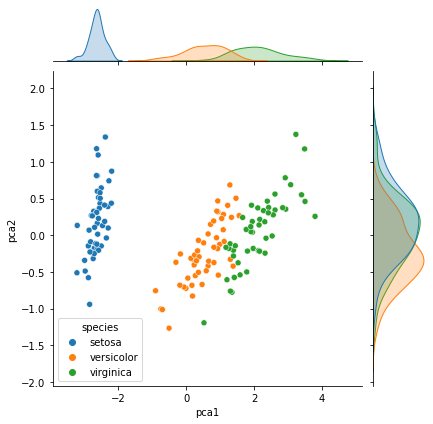

In [7]:
# Lasketaan pääkomponenttien arvot ja lisätään ne alkuperäiseen dataan

X_2D = malli.transform(X)
iris['pca1'] = X_2D[:, 0]
iris['pca2'] = X_2D[:, 1]

# Katsotaan miten lajikkeet jakautuvat pääkomponenttien suhteen
sns.jointplot(x='pca1', y='pca2', hue='species', data=iris)